# Case Study

## Part 1
*To be completed at the conclusion of Day 1*

For the following exercises, you should use the data stored at `../data/companies.csv`
You aren't expected to finish all the exercises; just get through as many as time allows and we will review them together.

1. Start by becoming familiar with the data. How many rows and how many columns does it have? What are the data types of the columns?

In [1]:
# Load data
import pandas as pd
companies = pd.read_csv('../data/companies.csv')
companies.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [2]:
# Count of rows and columns
companies.shape

(505, 3)

In [3]:
# Data types
companies.dtypes

Symbol    object
Name      object
Sector    object
dtype: object

2. Set the data's index to be the "Symbol" column.

In [4]:
# Remember to assign the result of companies.set_index() back into the companies variable
companies = companies.set_index('Symbol')
companies

,Name,Sector
Symbol,,
MMM,3M Company,Industrials
AOS,A.O. Smith Corp,Industrials
ABT,Abbott Laboratories,Health Care
ABBV,AbbVie Inc.,Health Care
ACN,Accenture plc,Information Technology
...,...,...
XYL,Xylem Inc.,Industrials
YUM,Yum! Brands Inc,Consumer Discretionary
ZBH,Zimmer Biomet Holdings,Health Care


3. Look up the company with the symbol NCLH. What company is this? What sector is it in?

In [5]:
# Get the row with index "NCLH"
companies.loc['NCLH']

Name       Norwegian Cruise Line
Sector    Consumer Discretionary
Name: NCLH, dtype: object

4. Filter down to companies that *either* in the "Consumer Discretionary" or the "Consumer Staples" sectors.

In [6]:
# Write a condition to see which rows are in these two sectors. "|" means "OR"
condition = (companies['Sector'] == 'Consumer Discretionary') | (companies['Sector'] == 'Consumer Staples')
# Filter the data down based on this.
matching_companies = companies[condition]
matching_companies.head()

,Name,Sector
Symbol,,
AAP,Advance Auto Parts,Consumer Discretionary
MO,Altria Group Inc,Consumer Staples
AMZN,Amazon.com Inc.,Consumer Discretionary
APTV,Aptiv Plc,Consumer Discretionary
ADM,Archer-Daniels-Midland Co,Consumer Staples


In [7]:
# Or, more concisely, we can use .isin to test if values are in a list of things.
condition = companies['Sector'].isin(['Consumer Discretionary', 'Consumer Staples'])
# Filter the data down based on this.
matching_companies = companies[condition]
matching_companies.head()

,Name,Sector
Symbol,,
AAP,Advance Auto Parts,Consumer Discretionary
MO,Altria Group Inc,Consumer Staples
AMZN,Amazon.com Inc.,Consumer Discretionary
APTV,Aptiv Plc,Consumer Discretionary
ADM,Archer-Daniels-Midland Co,Consumer Staples


5. How many companies are left in the data now?

In [8]:
matching_companies.count()

Name      116
Sector    116
dtype: int64

6. Create a new column, "Symbol_Length", that is the length of the symbol of each company. *Hint: you may need to reset an index along the way.*

In [9]:
# First, we need to move Symbol out of the index and back to being a regular column.
companies = companies.reset_index()
companies.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [10]:
# The .str.len() method returns the length of each element in a column
companies['Symbol_Length'] = companies['Symbol'].str.len()
companies.head()

,Symbol,Name,Sector,Symbol_Length
0,MMM,3M Company,Industrials,3
1,AOS,A.O. Smith Corp,Industrials,3
2,ABT,Abbott Laboratories,Health Care,3
3,ABBV,AbbVie Inc.,Health Care,4
4,ACN,Accenture plc,Information Technology,3


7. Find the company named "Kroger Co.". Change its name to "The Kroger Company".

In [11]:
# First, let's figure out the syntax to get the cell where "Kroger Co." is stored.
# Simultaneously filter by that name AND select the Name column:
companies.loc[companies['Name'] == 'Kroger Co.', 'Name']

275    Kroger Co.
Name: Name, dtype: object

In [12]:
# With that syntax, we can use assignment to *overwrite it*.
companies.loc[companies['Name'] == 'Kroger Co.', 'Name'] = 'The Kroger Company'

In [13]:
# Let's look up that name in the data to make sure it's been updated.
companies.loc[companies['Name'] == 'The Kroger Company']

,Symbol,Name,Sector,Symbol_Length
275,KR,The Kroger Company,Consumer Staples,2


**Bonus**: *For these two exercises, you won't find examples of the solution in our notebooks.
You'll need to search for help on the internet.*

*Don't worry if you aren't able to solve them.*

1. Filter down to companies whose symbol starts with A. How many companies meet this criterion?

In [14]:
# .str.startswith() returns True/False for each element in a column
a_companies = companies.loc[companies['Symbol'].str.startswith('A')]
a_companies.shape

(59, 4)

2. What is the longest company name in the dataset? You could just search the data visually, but try to find a programmatic solution.

In [15]:
# First, let's make a column representing name length
companies['Name Length'] = companies['Name'].str.len()
# Then get the max of this column (the length of the longest name)
max_len = companies['Name Length'].max()
max_len

38

In [16]:
# Now with that number, let's see which row in the data it came from
companies.loc[companies['Name Length'] == max_len]

,Symbol,Name,Sector,Symbol_Length,Name Length
191,FIS,Fidelity National Information Services,Information Technology,3,38


## Part 2
*To be completed at the conclusion of Day 2*

This section again uses the data at `../data/companies.csv`.

1. Re-create the "Symbol_Length" column (see above).

In [17]:
import pandas as pd
companies = pd.read_csv('../data/companies.csv')
companies.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [18]:
# Create the Symbol_Length column
companies['Symbol_Length'] = companies['Symbol'].str.len()
companies.head()

,Symbol,Name,Sector,Symbol_Length
0,MMM,3M Company,Industrials,3
1,AOS,A.O. Smith Corp,Industrials,3
2,ABT,Abbott Laboratories,Health Care,3
3,ABBV,AbbVie Inc.,Health Care,4
4,ACN,Accenture plc,Information Technology,3


2. What is the average symbol length of companies in the data set?

In [19]:
companies['Symbol_Length'].mean()

3.122772277227723

3. What is the average symbol length by sector? That is, after grouping by sector, what is the average symbol length for each group?

In [20]:
companies.groupby('Sector', as_index=False).agg({'Symbol_Length': 'mean'})

,Sector,Symbol_Length
0,Consumer Discretionary,3.170732
1,Consumer Staples,2.882353
2,Energy,3.032258
3,Financials,3.086957
4,Health Care,3.278689
5,Industrials,3.089552
6,Information Technology,3.458333
7,Materials,2.920000
8,Real Estate,3.030303
9,Telecommunication Services,2.000000


4. How long is the longest company name? How long is the longest company name by sector?

In [21]:
# Longest company name ... start by adding a column for name length.
companies['Name Length'] = companies['Name'].str.len()
# Longest name:
companies['Name Length'].max()

38

In [22]:
# Longest name by sector -- groupby sector and aggregate with the max name length
lengths = companies.groupby('Sector', as_index=False).agg({'Name Length': 'max'})

In [23]:
pd.merge(lengths, companies, on=['Name Length', 'Sector'])

,Sector,Name Length,Symbol,Name,Symbol_Length
0,Consumer Discretionary,32,FOXA,Twenty-First Century Fox Class A,4
1,Consumer Discretionary,32,FOX,Twenty-First Century Fox Class B,3
2,Consumer Staples,28,TAP,Molson Coors Brewing Company,3
3,Energy,27,NOV,National Oilwell Varco Inc.,3
4,Financials,34,AIG,"American International Group, Inc.",3
5,Health Care,35,LH,Laboratory Corp. of America Holding,2
6,Industrials,30,FBHS,Fortune Brands Home & Security,4
7,Industrials,30,JCI,Johnson Controls International,3
8,Information Technology,38,FIS,Fidelity National Information Services,3
9,Materials,32,PKG,Packaging Corporation of America,3


Now open the pricing data at `../data/prices.csv`.
Note that this data is entirely fabricated and does not exhibit the qualities of real stock market data!

1. Become familiar with this data. What is its shape? What are its data types?

In [24]:
prices = pd.read_csv('../data/prices.csv')
prices.head()

,Symbol,Price,Quarter
0,MMM,150.259437,1
1,AOS,103.668371,1
2,ABT,253.780326,1
3,ABBV,306.823770,1
4,ACN,211.437491,1


In [25]:
# Shape
prices.shape

(2020, 3)

In [26]:
# Data types
prices.dtypes

Symbol      object
Price      float64
Quarter      int64
dtype: object

2. Get summary metrics (count, min, max, standard deviation, etc) for both the Price and Quarter columns. *Hint: we saw a method of DataFrames that will do this for you in a single line.*

In [27]:
# .describe() gets lots of metrics on all numeric columns
prices.describe()

,Price,Quarter
count,2020.000000,2020.000000
mean,219.446042,2.500000
std,85.912103,1.118311
min,45.437073,1.000000
25%,149.248976,1.750000
50%,215.679389,2.500000
75%,286.468536,3.250000
max,394.017364,4.000000


3. Perform an inner join between this data set and the companies data, on the Symbol column.

In [28]:
# The default type of join is inner, so we don't need to specify that
joined = pd.merge(prices, companies, on='Symbol')
joined

,Symbol,Price,Quarter,Name,Sector,Symbol_Length,Name Length
0,MMM,150.259437,1,3M Company,Industrials,3,10
1,MMM,134.425207,2,3M Company,Industrials,3,10
2,MMM,135.013910,3,3M Company,Industrials,3,10
3,MMM,137.325815,4,3M Company,Industrials,3,10
4,AOS,103.668371,1,A.O. Smith Corp,Industrials,3,15
...,...,...,...,...,...,...,...
2015,ZION,95.158470,4,Zions Bancorp,Financials,4,13
2016,ZTS,369.255493,1,Zoetis,Health Care,3,6
2017,ZTS,362.047214,2,Zoetis,Health Care,3,6
2018,ZTS,369.518002,3,Zoetis,Health Care,3,6


4. How many rows does our data have now?

In [29]:
joined.shape

(2020, 7)

5. What do you think this data represents? Form a hypothesis and look through the data more carefully until you are confident you understand what it is and how it is structured.

In [30]:
# You could inspect this data through filtering and aggregation. It's stock prices over 4 quarters -- rows are unique by Symbol-Quarter.
# (Also the prices are entirely fabricated, they're not real stock data)

6. Group the data by sector. What is the average first quarter price for a company in the Real Estate sector? What is the minimum fourth quarter price for a company in the Industrials sector?

In [31]:
# If we need average for Sector AND Quarter, we need to group by both.
# We can do multiple aggregations at once by providing a list of aggregations in our dictionary.
grouped = joined.groupby(['Sector', 'Quarter'], as_index=False).agg({'Price': ['mean', 'min']})
grouped

Sector Quarter       Price            
                                              mean         min
0       Consumer Discretionary       1  222.585952   74.004778
1       Consumer Discretionary       2  225.822561   80.967743
2       Consumer Discretionary       3  225.972760   76.770188
3       Consumer Discretionary       4  224.487994   77.550302
4             Consumer Staples       1  224.801905   83.415097
5             Consumer Staples       2  222.965122   68.066565
6             Consumer Staples       3  218.745432   65.263230
7             Consumer Staples       4  222.319942   69.460012
8                       Energy       1  208.821267   85.192479
9                       Energy       2  209.189060   69.954323
10                      Energy       3  207.425651   69.401208
11                      Energy       4  205.665770   69.863359
12                  Financials       1  222.278373   73.830833
13                  Financials       2  222.774162   67.697669
14                  Financials       3  222.261266   71.323972
15                  Financials       4  223.692157   65.889891
16                 Health Care       1  213.933645   76.587411
17                 Health Care       2  214.228852   69.345373
18                 Health Care       3  211.989329   58.585939
19                 Health Care       4  211.627318   45.437073
20                 Industrials       1  206.705884   78.447015
21                 Industrials       2  205.181996   72.099654
22                 Industrials       3  205.882463   60.238868
23                 Industrials       4  205.150942   56.452515
24      Information Technology       1  222.923603   76.629295
25      Information Technology       2  223.171076   78.201170
26      Information Technology       3  223.052953   76.734434
27      Information Technology       4  223.574857   63.595426
28                   Materials       1  225.103440   77.151844
29                   Materials       2  225.330260   71.496297
30                   Materials       3  226.212997   64.824373
31                   Materials       4  229.580251   75.028865
32                 Real Estate       1  232.728266   78.208964
33                 Real Estate       2  233.093138   73.069013
34                 Real Estate       3  236.021126   81.086275
35                 Real Estate       4  235.066663   68.700699
36  Telecommunication Services       1  336.405518  318.966711
37  Telecommunication Services       2  328.714384  313.425266
38  Telecommunication Services       3  325.765912  314.988127
39  Telecommunication Services       4  324.121884  301.210748
40                   Utilities       1  207.249417   93.645101
41                   Utilities       2  207.762181   83.828589
42                   Utilities       3  206.236289   85.734311
43                   Utilities       4  208.069434   77.167794

In [32]:
# Now we filter to the rows we're interested in. We can write a condition for each and apply them both with an OR (|)
is_q1_real_estate = (grouped['Sector'] == 'Real Estate') & (grouped['Quarter'] == 1)
is_q4_industrials = (grouped['Sector'] == 'Industrials') & (grouped['Quarter'] == 4)
grouped[is_q1_real_estate | is_q4_industrials]

Sector Quarter       Price           
                               mean        min
23  Industrials       4  205.150942  56.452515
32  Real Estate       1  232.728266  78.208964

In [33]:
# From the above we have our answers: $232 and $56, respectively

7. Filter the data down to just prices for Apple, Google, Microsoft, and Amazon.

In [34]:
# First, let's look for these in our data to make sure we know their names exactly
joined[joined['Name'].str.contains('Apple')]

,Symbol,Price,Quarter,Name,Sector,Symbol_Length,Name Length
204,AAPL,275.197947,1,Apple Inc.,Information Technology,4,10
205,AAPL,269.961337,2,Apple Inc.,Information Technology,4,10
206,AAPL,263.508526,3,Apple Inc.,Information Technology,4,10
207,AAPL,266.069127,4,Apple Inc.,Information Technology,4,10


In [35]:
joined[joined['Name'].str.contains('Microsoft')]

,Symbol,Price,Quarter,Name,Sector,Symbol_Length,Name Length
1248,MSFT,202.640689,1,Microsoft Corp.,Information Technology,4,15
1249,MSFT,202.093615,2,Microsoft Corp.,Information Technology,4,15
1250,MSFT,212.749636,3,Microsoft Corp.,Information Technology,4,15
1251,MSFT,220.409889,4,Microsoft Corp.,Information Technology,4,15


In [36]:
joined[joined['Name'].str.contains('Amazon')]

,Symbol,Price,Quarter,Name,Sector,Symbol_Length,Name Length
120,AMZN,220.750078,1,Amazon.com Inc.,Consumer Discretionary,4,15
121,AMZN,229.964972,2,Amazon.com Inc.,Consumer Discretionary,4,15
122,AMZN,233.972278,3,Amazon.com Inc.,Consumer Discretionary,4,15
123,AMZN,241.194174,4,Amazon.com Inc.,Consumer Discretionary,4,15


In [37]:
# From the above, we know the full company names are:
# - Apple Inc.
# - Microsoft Corp.
# - Amazon.com Inc.

In [38]:
# But Google isn't in here!?
joined[joined['Name'].str.contains('Google')]

,Symbol,Price,Quarter,Name,Sector,Symbol_Length,Name Length


In [39]:
# Or is it?
joined[joined['Name'].str.contains('Alphabet')]

,Symbol,Price,Quarter,Name,Sector,Symbol_Length,Name Length
108,GOOGL,109.175657,1,Alphabet Inc Class A,Information Technology,5,20
109,GOOGL,93.864951,2,Alphabet Inc Class A,Information Technology,5,20
110,GOOGL,80.795190,3,Alphabet Inc Class A,Information Technology,5,20
111,GOOGL,96.692314,4,Alphabet Inc Class A,Information Technology,5,20
112,GOOG,216.432380,1,Alphabet Inc Class C,Information Technology,4,20
113,GOOG,228.992923,2,Alphabet Inc Class C,Information Technology,4,20
114,GOOG,232.580066,3,Alphabet Inc Class C,Information Technology,4,20
115,GOOG,244.167211,4,Alphabet Inc Class C,Information Technology,4,20


In [40]:
big4_names = ['Apple Inc.', 'Microsoft Corp.', 'Amazon.com Inc.', 'Alphabet Inc Class A', 'Alphabet Inc Class C']
big4 = joined[joined['Name'].isin(big4_names)]
big4

,Symbol,Price,Quarter,Name,Sector,Symbol_Length,Name Length
108,GOOGL,109.175657,1,Alphabet Inc Class A,Information Technology,5,20
109,GOOGL,93.864951,2,Alphabet Inc Class A,Information Technology,5,20
110,GOOGL,80.795190,3,Alphabet Inc Class A,Information Technology,5,20
111,GOOGL,96.692314,4,Alphabet Inc Class A,Information Technology,5,20
112,GOOG,216.432380,1,Alphabet Inc Class C,Information Technology,4,20
113,GOOG,228.992923,2,Alphabet Inc Class C,Information Technology,4,20
114,GOOG,232.580066,3,Alphabet Inc Class C,Information Technology,4,20
115,GOOG,244.167211,4,Alphabet Inc Class C,Information Technology,4,20
120,AMZN,220.750078,1,Amazon.com Inc.,Consumer Discretionary,4,15
121,AMZN,229.964972,2,Amazon.com Inc.,Consumer Discretionary,4,15


8. Save this data as big_4.csv in the `../data` directory.

In [41]:
# Since we have a default index (nothing useful in there), remember not to save it.
big4.to_csv('../data/big_4.csv', index=False)

9. Using Seaborn, plot the price of these companies over 4 quarters. Encode the quarter as the x-axis, the price as the y-axis, and the company symbol as the hue.

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

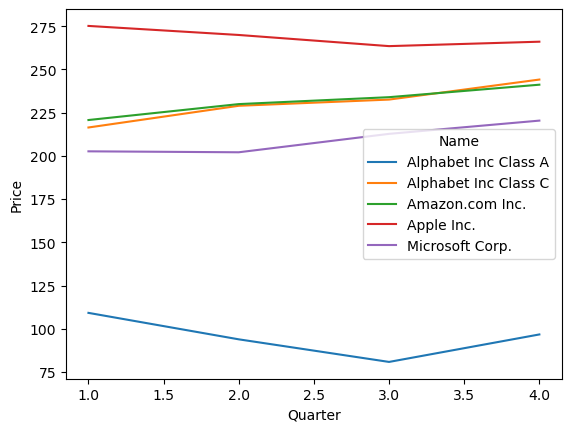

In [43]:
# I'd recommend a lineplot here as we're looking at change over time.
sns.lineplot(data=big4, x='Quarter', y='Price', hue='Name');

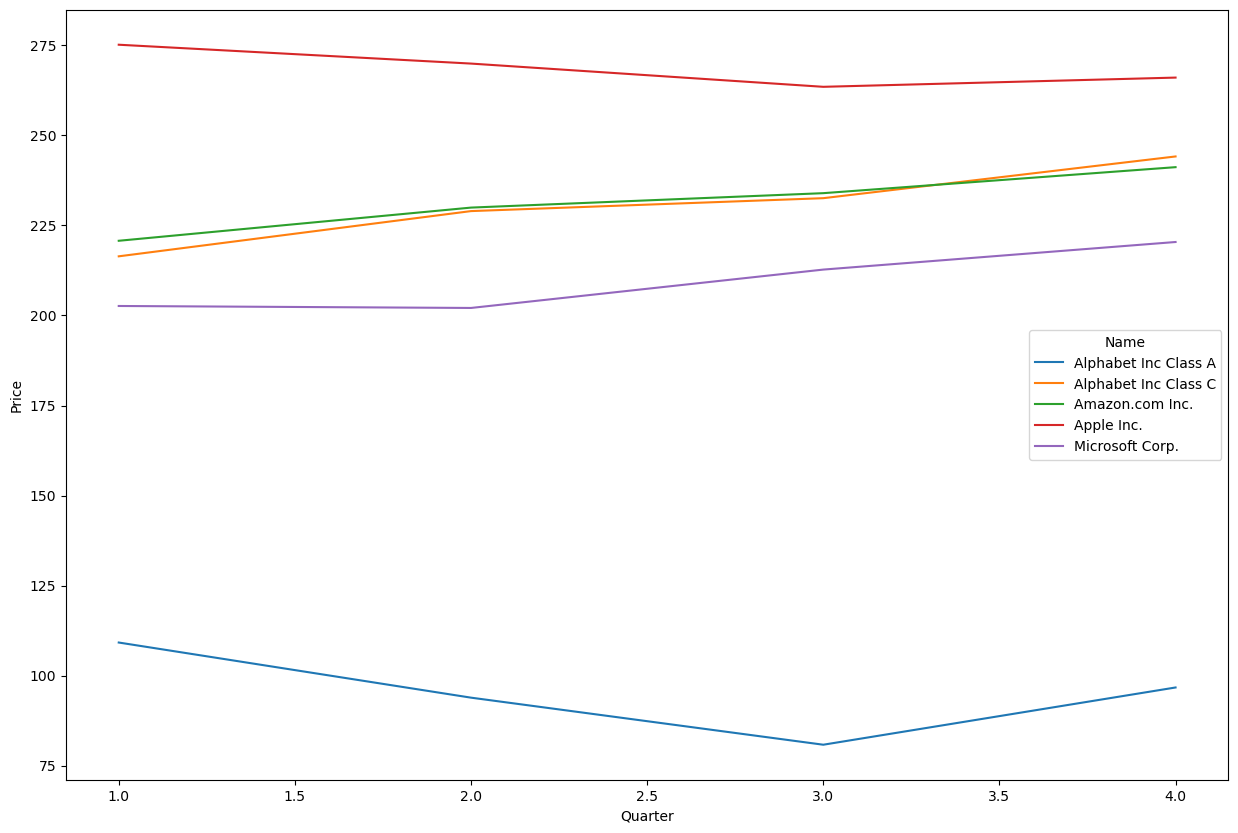

In [44]:
# You can expand the figure size to make it clearer
plt.figure(figsize=(15, 10))
sns.lineplot(data=big4, x='Quarter', y='Price', hue='Name');

**Bonus**:

This data is in a form that is useful for plotting.
But in this shape, it would be quite difficult to calculate the difference between each company's fourth quarter price and its first quarter price.

Reshape this data so it is of a form like the below:

| Symbol | Name | Sector | Q1 | Q2 | Q3 | Q4 |
|--------|------|--------|----|----|----|----|
| AAPL   | Apple Inc. | Information Technology | 275.20 | 269.96 | 263.51 | 266.07

From which we could easily calculate Q4 - Q1.

*You will probably want to google something like "python reshaping data". This is a very challenging problem!*

In [45]:
# It might require some googling to discover, but the method of a DFs that we need is .pivot...
pivoted = joined.pivot(index=['Symbol', 'Name', 'Sector'], columns='Quarter', values='Price')
pivoted

,,Quarter,1,2,3,4
Symbol,Name,Sector,,,,
A,Agilent Technologies Inc,Health Care,108.537146,123.035549,107.074047,121.495626
AAL,American Airlines Group,Industrials,100.899431,100.112269,97.926975,112.443200
AAP,Advance Auto Parts,Consumer Discretionary,197.234847,197.105863,183.020132,167.527210
AAPL,Apple Inc.,Information Technology,275.197947,269.961337,263.508526,266.069127
ABBV,AbbVie Inc.,Health Care,306.823770,300.571021,298.379969,312.456143
...,...,...,...,...,...,...
XYL,Xylem Inc.,Industrials,266.531913,256.286410,268.392017,265.997566
YUM,Yum! Brands Inc,Consumer Discretionary,215.899419,210.494214,220.060864,213.137089
ZBH,Zimmer Biomet Holdings,Health Care,171.701597,174.393363,159.811003,156.228987


In [46]:
# This is really close, but if we wanted to *exactly* match the example row, we'd need to do a couple things:
# First, move these columns out of the index make them regular columns again:
reindexed = pivoted.reset_index()
reindexed

Quarter,Symbol,Name,Sector,1,2,3,4
0,A,Agilent Technologies Inc,Health Care,108.537146,123.035549,107.074047,121.495626
1,AAL,American Airlines Group,Industrials,100.899431,100.112269,97.926975,112.443200
2,AAP,Advance Auto Parts,Consumer Discretionary,197.234847,197.105863,183.020132,167.527210
3,AAPL,Apple Inc.,Information Technology,275.197947,269.961337,263.508526,266.069127
4,ABBV,AbbVie Inc.,Health Care,306.823770,300.571021,298.379969,312.456143
...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,266.531913,256.286410,268.392017,265.997566
501,YUM,Yum! Brands Inc,Consumer Discretionary,215.899419,210.494214,220.060864,213.137089
502,ZBH,Zimmer Biomet Holdings,Health Care,171.701597,174.393363,159.811003,156.228987
503,ZION,Zions Bancorp,Financials,108.374701,103.727486,100.871958,95.158470


In [47]:
# Then, rename the columns (1, 2, 3, 4) -> (Q1, Q2, Q3, Q4)
final = reindexed.rename(columns={
    1: 'Q1',
    2: 'Q2',
    3: 'Q3',
    4: 'Q4'
})
final

Quarter,Symbol,Name,Sector,Q1,Q2,Q3,Q4
0,A,Agilent Technologies Inc,Health Care,108.537146,123.035549,107.074047,121.495626
1,AAL,American Airlines Group,Industrials,100.899431,100.112269,97.926975,112.443200
2,AAP,Advance Auto Parts,Consumer Discretionary,197.234847,197.105863,183.020132,167.527210
3,AAPL,Apple Inc.,Information Technology,275.197947,269.961337,263.508526,266.069127
4,ABBV,AbbVie Inc.,Health Care,306.823770,300.571021,298.379969,312.456143
...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,266.531913,256.286410,268.392017,265.997566
501,YUM,Yum! Brands Inc,Consumer Discretionary,215.899419,210.494214,220.060864,213.137089
502,ZBH,Zimmer Biomet Holdings,Health Care,171.701597,174.393363,159.811003,156.228987
503,ZION,Zions Bancorp,Financials,108.374701,103.727486,100.871958,95.158470
